# Подбор персонала

In [187]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

sns.set(); 

In [188]:
data = pd.read_csv('rabotaru_ru/data/train_public.csv')
data_test = pd.read_csv('rabotaru_ru/data/test.csv')

In [189]:
print(data.shape, data_test.shape)

(56297, 18) (14074, 15)


In [190]:
len(set(data_test['custom_position'].unique()) - set(data['custom_position'].unique()))

2548

In [191]:
#data_tt = pd.concat([data, data_test], axis=0)

In [192]:
#data_tt.shape

In [193]:
#rows_num = range(data.shape[0], data.shape[0] + data_test.shape[0])
#print(data.shape[0], data.shape[0] + data_test.shape[0])
#rows_num

In [194]:
#data_tt.drop(data_tt.index[rows_num], inplace=True)

In [195]:
#data_tt.shape

In [196]:
data.head(5)

,id,custom_position,operating_schedule_id,description,salary_from,offer_education_id,age_from,age_to,is_agency,is_nonresident,offer_experience_year_count,salary_to,is_male,driving_license,region_id,company_id,city_id,target_prof
0,268842,Подсобный рабочий,1,<strong>Обязанности:</strong><br />\r\n<ul>\r\...,34000,0,NaN,NaN,True,True,1.0,41000.0,True,[],{1783},1234787.0,70,рабочий
1,19090,Разнорабочий,7,<br />\nТребования: <br>На овощную базу в Подм...,66000,0,NaN,NaN,False,False,NaN,NaN,NaN,[],{3},NaN,1,разнорабочий
2,315832,Повар холодного цеха,1,<br />\nТребования: <br>Приготовление салатов....,40000,0,NaN,NaN,False,False,NaN,40000.0,NaN,[],{3},NaN,1,повар
3,365230,Разнорабочий,7,<strong>Обязанности:</strong><br />\r\n<ul>\r\...,35000,0,NaN,NaN,False,True,-100.0,40000.0,NaN,[],{5807},2784163.0,70,разнорабочий
4,154105,Региональный торговый представитель по Смоленс...,1,<strong>Обязанности:</strong><br /> &nbsp;<br ...,30000,4,NaN,NaN,False,True,2.0,70000.0,NaN,[],{362},1703984.0,258,представитель


In [197]:
data.columns

Index(['id', 'custom_position', 'operating_schedule_id', 'description',
       'salary_from', 'offer_education_id', 'age_from', 'age_to', 'is_agency',
       'is_nonresident', 'offer_experience_year_count', 'salary_to', 'is_male',
       'driving_license', 'region_id', 'company_id', 'city_id', 'target_prof'],
      dtype='object')

In [198]:
data.head(1).T

,0
id,268842
custom_position,Подсобный рабочий
operating_schedule_id,1
description,<strong>Обязанности:</strong><br />\r\n<ul>\r\...
salary_from,34000
offer_education_id,0
age_from,NaN
age_to,NaN
is_agency,True
is_nonresident,True


### Описание фичей

  - **id** - Идентификатор вакансии
  - **custom_position** - Название вакансии
  - **operating_schedule_id** - идентификатор графика работы, возможные значения указаны ниже
  - **salary_from** - зарплата от (всегда есть)
  - **salary_to** - потолок зарплаты
  - **description** - текстовое описание вакансии вместе с html тегами и знаками препинания
  - **offer_education_id** - идентификатор образования, расшифровку см. ниже
  - **offer_experience_year_count** - требуемый опыт (лет)
  - **age_from** - минимальный возраст работы
  - **age_to** - максимальный возраст работы
  - **company_id** - идентификатор компании, встречаются вакансии без компаний
  - **city_id** - идентификатор региона размещения (Москва и МО, ), крупные аггломерации
  - **is_agency** - является ли компания агенством
  - **is_nonresident** - доступна ли вакансия для иностранных граждан
  - **is_male** - ищут работников мужского (True), женского (False) пола, в случае пустого значения пол не имеет значения
  - **driving_license** - требуемые категории водительсктх прав
  - **region_id** - города в которых есть офисы компании и куда производится набор сотрудников (Set)
  - **target_prof** - рекомендуемая групповая профессия

In [199]:
# типы данных 
data.dtypes

id                               int64
custom_position                 object
operating_schedule_id            int64
description                     object
salary_from                      int64
offer_education_id               int64
age_from                       float64
age_to                         float64
is_agency                         bool
is_nonresident                    bool
offer_experience_year_count    float64
salary_to                      float64
is_male                         object
driving_license                 object
region_id                       object
company_id                     float64
city_id                          int64
target_prof                     object
dtype: object

In [200]:
# меняем тип некоторых колонок на категориальный
data['operating_schedule_id'] = data['operating_schedule_id'].astype('object')
data['offer_education_id'] = data['offer_education_id'].astype('object')
#data['is_male'] = data['is_male'].astype('bool')
data['company_id'] = data['company_id'].astype('object')
data['city_id'] = data['city_id'].astype('object')

In [201]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print('Категориальные признаки: ', categorical_columns)
print('Числовые признаки: ', numerical_columns)

Категориальные признаки:  ['custom_position', 'operating_schedule_id', 'description', 'offer_education_id', 'is_male', 'driving_license', 'region_id', 'company_id', 'city_id', 'target_prof']
Числовые признаки:  ['id', 'salary_from', 'age_from', 'age_to', 'is_agency', 'is_nonresident', 'offer_experience_year_count', 'salary_to']


In [202]:
# кол-во строк (вакансий) и колонок (их признаков)
data.shape

(56297, 18)

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56297 entries, 0 to 56296
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           56297 non-null  int64  
 1   custom_position              56297 non-null  object 
 2   operating_schedule_id        56297 non-null  object 
 3   description                  56297 non-null  object 
 4   salary_from                  56297 non-null  int64  
 5   offer_education_id           56297 non-null  object 
 6   age_from                     15798 non-null  float64
 7   age_to                       12931 non-null  float64
 8   is_agency                    56297 non-null  bool   
 9   is_nonresident               56297 non-null  bool   
 10  offer_experience_year_count  38622 non-null  float64
 11  salary_to                    34829 non-null  float64
 12  is_male                      8804 non-null   object 
 13  driving_license 

In [204]:
# описательная статистика по числоавым признакам
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,56297.0,235876.626019,135901.728858,18.0,118547.0,235786.0,353529.0,471177.0
salary_from,56297.0,38151.308773,86681.631959,-1.0,20000.0,35000.0,53000.0,19002500.0
age_from,15798.0,20.425434,4.056352,14.0,18.0,18.0,22.0,60.0
age_to,12931.0,53.606604,12.556347,22.0,45.0,52.0,60.0,99.0
offer_experience_year_count,38622.0,-34.882140,48.606458,-100.0,-100.0,0.0,1.0,10.0
salary_to,34829.0,46912.823423,111741.706222,-1.0,20000.0,40000.0,65000.0,19002500.0


In [205]:
# описательная статистика по категориальным признакам
data.describe(include=[object]).T

,count,unique,top,freq
custom_position,56297,14345,Грузчик,981
operating_schedule_id,56297,6,1,27010
description,56297,41692,<br />\nТребования: <br> <br />\nИнформация о ...,293
offer_education_id,56297,5,0,47394
is_male,8804,2,True,6912
driving_license,56297,16,[],54806
region_id,56297,1486,{3},18167
company_id,42499,10218,1.23479e+06,2040
city_id,56297,67,1,16144
target_prof,56297,521,водитель,4885


## Исследование признаков

### рекомендуемая групповая профессия (целевая переменная)

In [206]:
# сколько уникальных групповых профессий ?
data['target_prof'].nunique()

521

In [207]:
data['target_prof'].unique()[:10]

array(['рабочий', 'разнорабочий', 'повар', 'представитель', 'слесарь',
       'специалист', 'электромонтер', 'колорист', 'водитель',
       'администратор'], dtype=object)

In [208]:
# статистика распределения профессий (в абсолютных значениях)
data['target_prof'].value_counts()

водитель       4885
продавец       3360
менеджер       2399
повар          2284
грузчик        2137
               ... 
дознаватель       1
землекоп          1
лектор            1
антенщик          1
кеттельщик        1
Name: target_prof, Length: 521, dtype: int64

In [209]:
# статистика распределения профессий (в относительных долях)
data['target_prof'].value_counts(normalize = True)

водитель       0.086772
продавец       0.059683
менеджер       0.042613
повар          0.040571
грузчик        0.037959
                 ...   
дознаватель    0.000018
землекоп       0.000018
лектор         0.000018
антенщик       0.000018
кеттельщик     0.000018
Name: target_prof, Length: 521, dtype: float64

In [210]:
#data['target_prof'].hist()

## Визуализация

In [211]:
#sns.pairplot(data)

In [212]:
# матрица корреляций
data.corr()

,id,salary_from,age_from,age_to,is_agency,is_nonresident,offer_experience_year_count,salary_to
id,1.000000,0.000573,0.009224,-0.150269,-0.048694,0.048434,-0.029145,0.010016
salary_from,0.000573,1.000000,0.207308,0.000840,0.046251,0.049817,0.166805,0.966633
age_from,0.009224,0.207308,1.000000,-0.107405,-0.006695,-0.002874,0.422167,0.092278
age_to,-0.150269,0.000840,-0.107405,1.000000,-0.017456,0.184849,-0.230461,-0.026269
is_agency,-0.048694,0.046251,-0.006695,-0.017456,1.000000,0.066788,0.008550,0.044461
is_nonresident,0.048434,0.049817,-0.002874,0.184849,0.066788,1.000000,0.079616,0.065214
offer_experience_year_count,-0.029145,0.166805,0.422167,-0.230461,0.008550,0.079616,1.000000,0.059082
salary_to,0.010016,0.966633,0.092278,-0.026269,0.044461,0.065214,0.059082,1.000000


In [213]:
#sns.heatmap(data[numerical_columns])

## Предобработка данных

### Удаление выбросов в числовых полях (salary_from, salary_to)

In [214]:
data['salary_from'].describe()

count    5.629700e+04
mean     3.815131e+04
std      8.668163e+04
min     -1.000000e+00
25%      2.000000e+04
50%      3.500000e+04
75%      5.300000e+04
max      1.900250e+07
Name: salary_from, dtype: float64

In [215]:
data['salary_from'].count()

56297

In [216]:
#data['salary_from'].plot()

In [217]:
max(data['salary_from'])

19002500

In [218]:
z_scores = scipy.stats.zscore(data['salary_from'])
abs_z_scores  = np.abs(z_scores)

#outliers_indeces = data['salary_from'][abs_z_scores > 4].index
#data.iloc[ outliers_indeces ]
#outliers_indeces.remove(46401)

#len(data.drop(data['salary_from'][abs_z_scores > 4].index))
#data.drop(data['salary_from'][abs_z_scores > 5].index, inplace=True)

In [219]:
print(data['salary_to'].count())
data['salary_to'].describe()

34829


count    3.482900e+04
mean     4.691282e+04
std      1.117417e+05
min     -1.000000e+00
25%      2.000000e+04
50%      4.000000e+04
75%      6.500000e+04
max      1.900250e+07
Name: salary_to, dtype: float64

In [220]:
#data['salary_to'].hist()

In [221]:
# удаляем строку с максимальной salary_to - это единственный выброс в этом поле
#data['salary_to'].quantile(0.9)
#data[ data['salary_to'] == data['salary_to'].max() ]

#data.drop( data[data['salary_to'] == data['salary_to'].max()].index, inplace=True)

In [222]:
#data.drop( data[data['salary_to'] == -1].index, inplace=True)

In [223]:
# значения salary_to == 0 заменяем на salary_from
sf = data[data['salary_to'] == 0]['salary_from']
#data.loc[data['salary_to'] == 0, 'salary_to'] = sf

In [224]:
#data.drop( data[data['salary_to'] == 0].index, inplace=True)

### Заполнение пропущенных значений

In [225]:
data.count(axis=0)

id                             56297
custom_position                56297
operating_schedule_id          56297
description                    56297
salary_from                    56297
offer_education_id             56297
age_from                       15798
age_to                         12931
is_agency                      56297
is_nonresident                 56297
offer_experience_year_count    38622
salary_to                      34829
is_male                         8804
driving_license                56297
region_id                      56297
company_id                     42499
city_id                        56297
target_prof                    56297
dtype: int64

In [226]:
# для записей, где не указана верхняя планка зарплаты, берём значение из нижней планки
data['salary_to'].fillna(data['salary_from'], axis=0, inplace=True)

In [227]:
data['age_from'].describe()

count    15798.000000
mean        20.425434
std          4.056352
min         14.000000
25%         18.000000
50%         18.000000
75%         22.000000
max         60.000000
Name: age_from, dtype: float64

In [228]:
data['age_from'].mode()

0    18.0
dtype: float64

<AxesSubplot:>

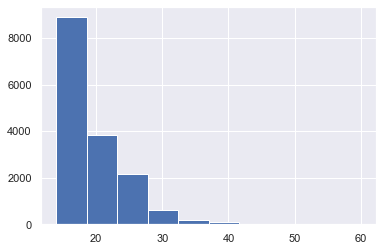

In [229]:
data['age_from'].hist()

In [230]:
# "возраст от" заменяем на моду (наиболее часто встречающееся значение)
data['age_from'].fillna(int(data['age_from'].mode()), axis=0, inplace=True)

In [231]:
data['age_to'].describe()
#data['age_to'].hist()

count    12931.000000
mean        53.606604
std         12.556347
min         22.000000
25%         45.000000
50%         52.000000
75%         60.000000
max         99.000000
Name: age_to, dtype: float64

In [232]:
# "возраст до" заменяем на среднее значение
data['age_to'].fillna(data['age_to'].mean(axis=0), axis=0, inplace=True)

In [233]:
# исследуем переменную "требуемый опыт (лет)"
data['offer_experience_year_count'].describe()

count    38622.000000
mean       -34.882140
std         48.606458
min       -100.000000
25%       -100.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: offer_experience_year_count, dtype: float64

<AxesSubplot:>

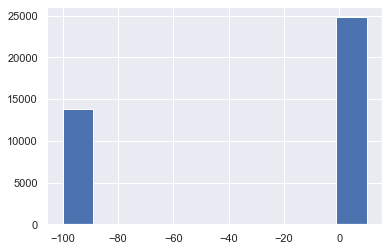

In [234]:
data['offer_experience_year_count'].hist()

<AxesSubplot:>

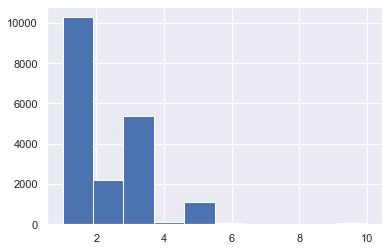

In [235]:
(data[ data['offer_experience_year_count'] > 0 ]['offer_experience_year_count']).hist()

In [236]:
data.loc[ data['offer_experience_year_count'] < 0, 'offer_experience_year_count'] = None

In [237]:
# заменяем требуемый опыт на среднее значение
print(data['offer_experience_year_count'].mean(axis=0))
data['offer_experience_year_count'].fillna(data['offer_experience_year_count'].mean(axis=0), axis=0, inplace=True)

1.7976722090261283


In [238]:
# для каиегориальной переменной company_id заменяем пропуски на самое популярное значение
data['company_id'].describe()

count       42499.0
unique      10218.0
top       1234787.0
freq         2040.0
Name: company_id, dtype: float64

In [239]:
data['company_id'].fillna(data['company_id'].describe().top, axis=0, inplace=True)

In [240]:
print(data['driving_license'].describe())
data['driving_license'].fillna(data['driving_license'].describe().top, axis=0, inplace=True)

count     56297
unique       16
top          []
freq      54806
Name: driving_license, dtype: object


In [241]:
# для каиегориальной переменной operating_schedule_id заменяем пропуски на самое популярное значение
data['operating_schedule_id'].describe()

count     56297
unique        6
top           1
freq      27010
Name: operating_schedule_id, dtype: int64

In [242]:
data['operating_schedule_id'].fillna(data['operating_schedule_id'].describe().top, axis=0, inplace=True)

In [243]:
data['offer_education_id'].fillna(data['offer_education_id'].describe().top, axis=0, inplace=True)

In [244]:
data['is_male'].describe()

count     8804
unique       2
top       True
freq      6912
Name: is_male, dtype: object

In [245]:
# для пола заменяем константы True и False на 1 и 0
data.loc[ data['is_male'] == True, 'is_male'] = 1
data.loc[ data['is_male'] == False, 'is_male'] = 0

In [246]:
# для каиегориальной переменной is_male заменяем пропуски на новое значение - 2 (не указан)
data['is_male'].fillna(2, axis=0, inplace=True) 

In [247]:
data['is_agency'].describe()

count     56297
unique        2
top       False
freq      49062
Name: is_agency, dtype: object

In [248]:
# для is_agency заменяем константы True и False на 1 и 0
data.loc[ data['is_agency'] == True, 'is_agency'] = 1
data.loc[ data['is_agency'] == False, 'is_agency'] = 0

# для каиегориальной переменной is_agency заменяем пропуски на самое популярное значение
data['is_agency'].fillna(data['is_agency'].describe().top, axis=0, inplace=True)

In [249]:
data['is_nonresident'].describe()

count     56297
unique        2
top        True
freq      30716
Name: is_nonresident, dtype: object

In [250]:
# для is_nonresident заменяем константы True и False на 1 и 0
data.loc[ data['is_nonresident'] == True, 'is_nonresident'] = 1
data.loc[ data['is_nonresident'] == False, 'is_nonresident'] = 0

# для каиегориальной переменной is_nonresident заменяем пропуски на самое популярное значение
data['is_nonresident'].fillna(data['is_nonresident'].describe().top, axis=0, inplace=True)

In [251]:
# проверяем, что во всех колонках отсутствуют пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56297 entries, 0 to 56296
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           56297 non-null  int64  
 1   custom_position              56297 non-null  object 
 2   operating_schedule_id        56297 non-null  int64  
 3   description                  56297 non-null  object 
 4   salary_from                  56297 non-null  int64  
 5   offer_education_id           56297 non-null  int64  
 6   age_from                     56297 non-null  float64
 7   age_to                       56297 non-null  float64
 8   is_agency                    56297 non-null  int64  
 9   is_nonresident               56297 non-null  int64  
 10  offer_experience_year_count  56297 non-null  float64
 11  salary_to                    56297 non-null  float64
 12  is_male                      56297 non-null  int64  
 13  driving_license 

## Нормализация числовых данных

In [252]:
# 'salary_from', , 'salary_to'
numerical_columns = [ 'age_from', 'age_to', 'offer_experience_year_count' ]

In [253]:
# выделяем датафрейм с числовыми признаками и нормируем значения
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,age_from,age_to,offer_experience_year_count
count,5.629700e+04,5.629700e+04,5.629700e+04
mean,-4.404783e-16,1.698584e-12,1.162118e-12
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.942741e+00,-5.252354e+00,-2.200734e+00
25%,-2.824994e-01,1.697951e-12,1.160170e-12
50%,-2.824994e-01,1.697951e-12,1.160170e-12
75%,-2.824994e-01,1.697951e-12,1.160170e-12
max,1.715004e+01,7.543430e+00,1.004140e+01


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56297 entries, 0 to 56296
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           56297 non-null  int64  
 1   custom_position              56297 non-null  object 
 2   operating_schedule_id        56297 non-null  int64  
 3   description                  56297 non-null  object 
 4   salary_from                  56297 non-null  int64  
 5   offer_education_id           56297 non-null  int64  
 6   age_from                     56297 non-null  float64
 7   age_to                       56297 non-null  float64
 8   is_agency                    56297 non-null  int64  
 9   is_nonresident               56297 non-null  int64  
 10  offer_experience_year_count  56297 non-null  float64
 11  salary_to                    56297 non-null  float64
 12  is_male                      56297 non-null  int64  
 13  driving_license 

In [255]:
data['custom_position'].describe()

count       56297
unique      14345
top       Грузчик
freq          981
Name: custom_position, dtype: object

## Векторизация категориальных признаков

In [256]:
# 
categorical_columns = ['custom_position', 'region_id', 'operating_schedule_id', 'offer_education_id', 'is_agency', 
                       'is_nonresident', 'is_male', 'driving_license', 'company_id', 'city_id']

data['operating_schedule_id'] = data['operating_schedule_id'].astype('object')
data['is_male'] = data['is_male'].astype('object')
data['company_id'] = data['company_id'].astype('object')
data['is_agency'] = data['is_agency'].astype('object')
data['is_nonresident'] = data['is_nonresident'].astype('object')
data['offer_education_id'] = data['offer_education_id'].astype('object')

data_describe = data.describe(include=[object])
data_describe

,custom_position,operating_schedule_id,description,offer_education_id,is_agency,is_nonresident,is_male,driving_license,region_id,company_id,city_id,target_prof
count,56297,56297,56297,56297,56297,56297,56297,56297,56297,56297.0,56297,56297
unique,14345,6,41692,5,2,2,3,16,1486,10218.0,67,521
top,Грузчик,1,<br />\nТребования: <br> <br />\nИнформация о ...,0,0,1,2,[],{3},1234787.0,1,водитель
freq,981,27010,293,47394,49062,30716,47493,54806,18167,15838.0,16144,4885


In [257]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print('Бинарные категориальные признаки: ', binary_columns)
print('Небинарные категориальные признаки: ', nonbinary_columns)

Бинарные категориальные признаки:  ['is_agency', 'is_nonresident']
Небинарные категориальные признаки:  ['custom_position', 'region_id', 'operating_schedule_id', 'offer_education_id', 'is_male', 'driving_license', 'company_id', 'city_id']


In [258]:
# выделяем датафрейм с бинарными признаками
#data_binary = data[binary_columns]
#data_binary.describe()

In [259]:
%%time



# для небинарных признаков создаём фиктивные колонки
data_nonbinary = pd.get_dummies(data[nonbinary_columns])

Wall time: 6.28 s


In [260]:
print('Всего фиктивных признаков', len(data_nonbinary.columns))
print(data_nonbinary.columns)

Всего фиктивных признаков 26146
Index(['custom_position_(копия)Автокурьер',
       'custom_position_(копия)Администратор/приемщик заказов в похоронное бюро',
       'custom_position_(копия)Бетонщик-монолитчик',
       'custom_position_(копия)Водитель категории B на личном автомобиле',
       'custom_position_(копия)Водитель контейнеровоза',
       'custom_position_(копия)Водитель с личным автомобилем',
       'custom_position_(копия)Водитель такси',
       'custom_position_(копия)Водитель такси (аренда)',
       'custom_position_(копия)Водитель такси на автомобиле таксопарка',
       'custom_position_(копия)Водитель-экспедитор',
       ...
       'city_id_256', 'city_id_258', 'city_id_259', 'city_id_260',
       'city_id_261', 'city_id_263', 'city_id_268', 'city_id_269',
       'city_id_270', 'city_id_272'],
      dtype='object', length=26146)


## Соединение признаков всех типов в единый дата-фрейм

In [261]:
%%time
data_all = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data_all = pd.DataFrame(data_all, dtype=float)

Wall time: 6.4 s


In [262]:
# размеры
data_all.shape

(56297, 26151)

In [263]:
data_all.head()

,age_from,age_to,offer_experience_year_count,is_agency,is_nonresident,custom_position_(копия)Автокурьер,custom_position_(копия)Администратор/приемщик заказов в похоронное бюро,custom_position_(копия)Бетонщик-монолитчик,custom_position_(копия)Водитель категории B на личном автомобиле,custom_position_(копия)Водитель контейнеровоза,...,city_id_256,city_id_258,city_id_259,city_id_260,city_id_261,city_id_263,city_id_268,city_id_269,city_id_270,city_id_272
0,-0.282499,1.697951e-12,-9.765207e-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.282499,1.697951e-12,1.160170e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.282499,1.697951e-12,1.160170e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.282499,1.697951e-12,1.160170e-12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.282499,1.697951e-12,2.476923e-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [264]:
# выделяем отдельный вектор-столбец с целевой переменной - target_prof
y = data['target_prof']
y.head()

0          рабочий
1     разнорабочий
2            повар
3     разнорабочий
4    представитель
Name: target_prof, dtype: object

In [265]:
X = data_all
feature_names = X.columns

In [266]:
y.describe()

count        56297
unique         521
top       водитель
freq          4885
Name: target_prof, dtype: object

## Обучение на всех данных

In [137]:
%%time
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X, y)

Wall time: 12min 28s


RandomForestClassifier(random_state=11)

In [138]:
from joblib import dump, load
dump(rf, 'rf_1.joblib') 

['rf_1.joblib']

In [267]:
data = pd.read_csv('rabotaru_ru/data/test.csv')

In [268]:
data.shape

(14074, 15)

In [269]:
data.head()

,id,custom_position,operating_schedule_id,description,offer_education_id,age_from,age_to,is_agency,is_nonresident,offer_experience_year_count,is_male,driving_license,region_id,company_id,city_id
0,286961,Водитель-курьер по доставке еды,3,<strong>Приглашаем на работу ВОДИТЕЛЕЙ-КУРЬЕРО...,0,18.0,50.0,False,True,-100.0,NaN,['B'],{209},1172596.0,57
1,423834,Упаковщик печенья (вахта),7,"Прямой работодатель, с сезонным расширением пр...",0,NaN,NaN,False,False,NaN,NaN,[],{3},1879927.0,1
2,336464,Менеджер по туризму,3,<strong>Обязанности:</strong><br />\r\n<ul>\r\...,4,NaN,NaN,False,False,1.0,NaN,[],{1278},2724192.0,57
3,287634,Повар - сушист,1,Компания PIZZASUSHIWOK приглашает на работу по...,0,18.0,50.0,False,True,-100.0,NaN,[],{3},1172596.0,1
4,174883,Уборщик/Уборщица АЗС 145,3,<br /> <br />Требуется уборщик/ца на АЗС 145.<...,0,NaN,NaN,False,True,-1.0,NaN,[],{1278},1952643.0,1


In [270]:
# меняем тип некоторых колонок на категориальный
data['operating_schedule_id'] = data['operating_schedule_id'].astype('object')
data['is_male'] = data['is_male'].astype('object')
data['company_id'] = data['company_id'].astype('object')
data['is_agency'] = data['is_agency'].astype('object')
data['is_nonresident'] = data['is_nonresident'].astype('object')
data['offer_education_id'] = data['offer_education_id'].astype('object')

In [271]:
# "возраст от" заменяем на моду (наиболее часто встречающееся значение)
data['age_from'].fillna(int(data['age_from'].mode()), axis=0, inplace=True)

In [272]:
# "возраст до" заменяем на среднее значение
data['age_to'].fillna(data['age_to'].mean(axis=0), axis=0, inplace=True)

In [273]:
data.loc[ data['offer_experience_year_count'] < 0, 'offer_experience_year_count'] = None

# заменяем требуемый опыт на среднее значение
print(data['offer_experience_year_count'].mean(axis=0))
data['offer_experience_year_count'].fillna(data['offer_experience_year_count'].mean(axis=0), axis=0, inplace=True)

1.826244516498188


In [274]:
# для каиегориальной переменной company_id заменяем пропуски на самое популярное значение
data['company_id'].fillna(data['company_id'].describe().top, axis=0, inplace=True)

In [275]:
data['operating_schedule_id'].fillna(data['operating_schedule_id'].describe().top, axis=0, inplace=True)

In [276]:
data['driving_license'].fillna(data['driving_license'].describe().top, axis=0, inplace=True)

In [277]:
data['offer_education_id'].fillna(data['offer_education_id'].describe().top, axis=0, inplace=True)

In [278]:
# для пола заменяем константы True и False на 1 и 0
data.loc[ data['is_male'] == True, 'is_male'] = 1
data.loc[ data['is_male'] == False, 'is_male'] = 0

In [279]:
# для каиегориальной переменной is_male заменяем пропуски на 2
data['is_male'].fillna(2, axis=0, inplace=True)

In [280]:
# для is_agency заменяем константы True и False на 1 и 0
data.loc[ data['is_agency'] == True, 'is_agency'] = 1
data.loc[ data['is_agency'] == False, 'is_agency'] = 0

In [281]:
# для каиегориальной переменной is_agency заменяем пропуски на самое популярное значение
data['is_agency'].fillna(data['is_agency'].describe().top, axis=0, inplace=True)

In [282]:
# для is_nonresident заменяем константы True и False на 1 и 0
data.loc[ data['is_nonresident'] == True, 'is_nonresident'] = 1
data.loc[ data['is_nonresident'] == False, 'is_nonresident'] = 0

data['is_nonresident'].fillna(data['is_nonresident'].describe().top, axis=0, inplace=True)

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14074 entries, 0 to 14073
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14074 non-null  int64  
 1   custom_position              14074 non-null  object 
 2   operating_schedule_id        14074 non-null  int64  
 3   description                  14074 non-null  object 
 4   offer_education_id           14074 non-null  int64  
 5   age_from                     14074 non-null  float64
 6   age_to                       14074 non-null  float64
 7   is_agency                    14074 non-null  int64  
 8   is_nonresident               14074 non-null  int64  
 9   offer_experience_year_count  14074 non-null  float64
 10  is_male                      14074 non-null  int64  
 11  driving_license              14074 non-null  object 
 12  region_id                    14074 non-null  object 
 13  company_id      

In [284]:
categorical_columns = ['custom_position', 'region_id', 'operating_schedule_id', 'offer_education_id', 'is_agency', 
                       'is_nonresident', 'is_male', 'driving_license', 'company_id', 'city_id']

data['operating_schedule_id'] = data['operating_schedule_id'].astype('object')
data['is_male'] = data['is_male'].astype('object')
data['company_id'] = data['company_id'].astype('object')
data['is_agency'] = data['is_agency'].astype('object')
data['is_nonresident'] = data['is_nonresident'].astype('object')
data['offer_education_id'] = data['offer_education_id'].astype('object')
data['city_id'] = data['city_id'].astype('object')

data_describe = data.describe(include=[object])
data_describe

,custom_position,operating_schedule_id,description,offer_education_id,is_agency,is_nonresident,is_male,driving_license,region_id,company_id,city_id
count,14074,14074,14074,14074,14074,14074,14074,14074,14074,14074.0,14074
unique,5130,6,11953,5,2,2,3,12,839,3541.0,65
top,Грузчик,1,<br />\nТребования: <br> <br />\nИнформация о ...,0,0,1,2,[],{3},1234787.0,1
freq,221,6777,67,11817,12272,7671,11963,13741,4482,3993.0,4028


In [285]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print('Бинарные категориальные признаки: ', binary_columns)
print('Небинарные категориальные признаки: ', nonbinary_columns)

Бинарные категориальные признаки:  ['is_agency', 'is_nonresident']
Небинарные категориальные признаки:  ['custom_position', 'region_id', 'operating_schedule_id', 'offer_education_id', 'is_male', 'driving_license', 'company_id', 'city_id']


In [286]:
numerical_columns = ['age_from', 'age_to', 'offer_experience_year_count']

# выделяем датафрейм с числовыми признаками и нормируем значения
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,age_from,age_to,offer_experience_year_count
count,1.407400e+04,1.407400e+04,1.407400e+04
mean,1.259788e-17,-2.272954e-13,-5.494061e-14
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.934553e+00,-5.832125e+00,-2.156495e+00
25%,-2.772563e-01,-2.277007e-13,-5.348843e-14
50%,-2.772563e-01,-2.277007e-13,-5.348843e-14
75%,-2.772563e-01,-2.277007e-13,-5.348843e-14
max,1.505274e+01,7.660935e+00,9.651862e+00


In [287]:
data['custom_position'].nunique()

5130

In [288]:
# для небинарных признаков создаём фиктивные колонки
data_nonbinary = pd.get_dummies(data[nonbinary_columns])

In [289]:
data_nonbinary.shape

(14074, 9601)

In [292]:
%%time
X_test = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
X_test = pd.DataFrame(X_test, dtype=float)

Wall time: 187 ms


In [293]:
X_test.shape

(14074, 9606)

In [305]:
missing_cols = set( X.columns ) - set( X_test.columns )
len(list(missing_cols))

0

In [296]:
%%time
for c in missing_cols:
    X_test[c] = 0
X_test = X_test[X.columns]

In [300]:
y_test = rf.predict(X_test)

In [307]:
y_test.shape
y_test[:10]

array(['водитель', 'упаковщик', 'врач', 'повар', 'заправщик', 'почтальон',
       'рабочий', 'аналитик', 'сварщик', 'столяр'], dtype=object)

In [318]:
res_columns = ['id','salary_from','salary_to','target_prof']
zero_list =  [0] * len(y_test)

df_res = pd.DataFrame(list(zip(data['id'], zero_list, zero_list, y_test)), 
                      columns=res_columns)
df_res

,id,salary_from,salary_to,target_prof
0,286961,0,0,водитель
1,423834,0,0,упаковщик
2,336464,0,0,врач
3,287634,0,0,повар
4,174883,0,0,заправщик
...,...,...,...,...
14069,290923,0,0,рабочий
14070,175080,0,0,упаковщик
14071,451820,0,0,инженер
14072,257668,0,0,ассистент


In [319]:
df_res.to_csv('submit.csv', index=False)

## Разделение выборок

In [72]:
# для классификации
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 11)

Wall time: 21.1 s


In [ ]:
# для регрессии

In [73]:
del X
gc.collect()

In [75]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

39044 9762


In [75]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, random_state=11)

In [76]:
%%time
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.3167661866292003 0.47650594181122796


In [77]:
%%time
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [77]:
%%time
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)


Wall time: 40.3 s


In [79]:
acc = accuracy_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict, average = 'macro')
print(acc, f1)

0.7340438129070456 0.4893812095334472


In [80]:
y_test_predict[:10]

array(['слесарь', 'водитель', 'курьер', 'водитель', 'маркетолог',
       'токарь', 'водитель', 'программист', 'работник', 'охранник'],
      dtype=object)

In [ ]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)